In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stringency_df = pd.read_csv('covid-stringency-index.csv')
complete_df = pd.read_csv('Merged_algo_tester_gvb.csv')

In [3]:
# Amount of countries
len(stringency_df['Entity'].unique())

185

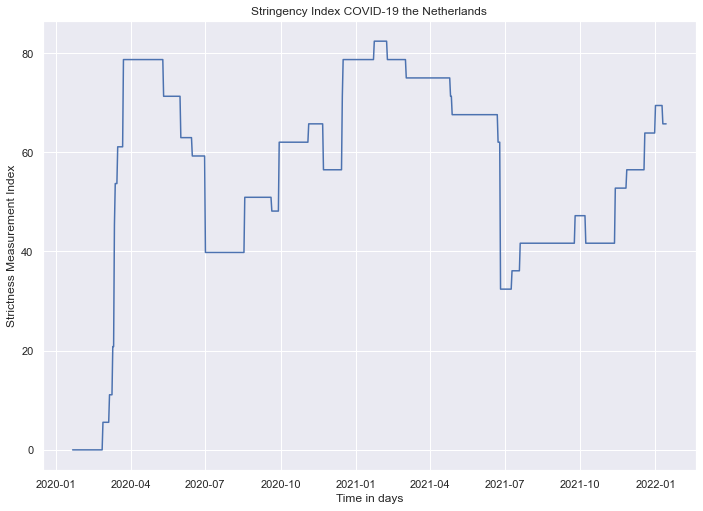

In [4]:
stringency_df['Day'] = pd.to_datetime(stringency_df['Day'])
complete_df['Date'] = pd.to_datetime(complete_df['Date'])
stringency_df_NL = stringency_df[stringency_df['Entity']=='Netherlands']

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=stringency_df_NL, x="Day", y="stringency_index")
ax.set(xlabel="Time in days", ylabel="Strictness Measurement Index", title="Stringency Index COVID-19 the Netherlands");

In [5]:
merged_df = complete_df.merge(stringency_df_NL, how = 'left', left_on='Date', right_on='Day')
merged_df = merged_df.set_index('Datetime')

<AxesSubplot:xlabel='Datetime', ylabel='stringency_index'>

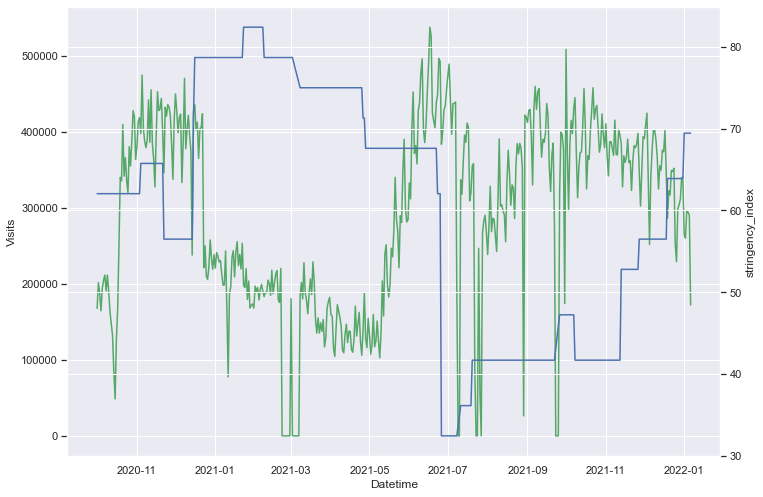

In [6]:
import matplotlib.pyplot as plt
test = merged_df[['Visits','stringency_index']] 
test.index = pd.to_datetime(test.index)
test2 = test.resample("D").agg({'Visits':'sum','stringency_index':'mean'})#[#.resample("D"
sns.lineplot(data=test2.Visits, color="g")
ax2 = plt.twinx()
sns.lineplot(data=test2.stringency_index, color="b", ax=ax2)

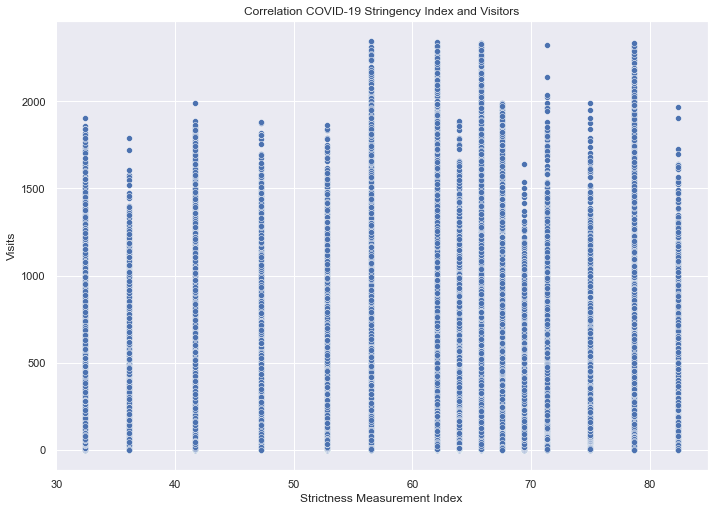

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data=merged_df, x="stringency_index", y="Visits")
ax.set(xlabel="Strictness Measurement Index", ylabel="Visits", title="Correlation COVID-19 Stringency Index and Visitors");
